In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
X , y = data.data ,data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [7]:
X_train_tensor = torch.tensor(X_train_scaled,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.long)
y_test_tensor = torch.tensor(y_test,dtype=torch.long)

In [8]:
print(X_train_tensor.shape,X_test_tensor.shape,y_train_tensor.shape,y_test_tensor.shape)

torch.Size([455, 30]) torch.Size([114, 30]) torch.Size([455]) torch.Size([114])


In [9]:
model = nn.Sequential(
    nn.Linear(30,20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,2)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

Test Accuracy: 0.9912, Test Loss: 0.0317


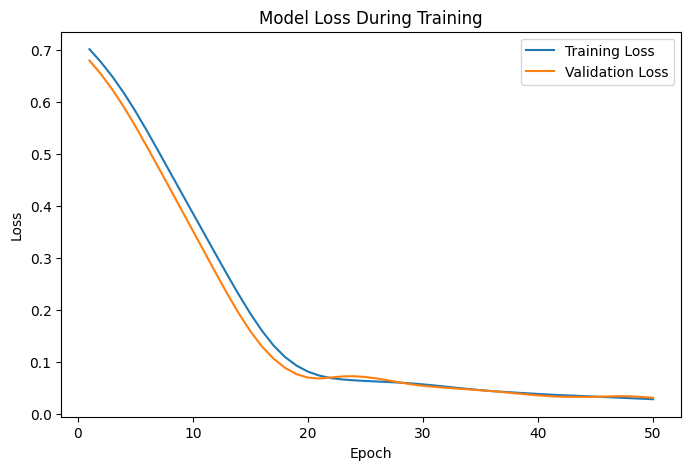

In [11]:
num_epochs = 50
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val, y_test_tensor)
        history['val_loss'].append(val_loss.item())

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs, y_test_tensor).item()
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test_tensor, predicted)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plotting actual training and validation loss
epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()